<h3> Use Real Phenotypes on 2706 training samples, July 16th </h3>
instead of using simulated phenotypes. 

In [2]:
import numpy as np
import pandas as pd
import magenpy as mgp
import viprs as vp
import subprocess
import io
from viprs.eval.metrics import r2 
from data.utils.Simulate_training import ELBO_plot
from data.utils.Simulate_training import *
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

<h5> For chr22, shuffled 500 SNPs  </h5>

In [3]:
# real_phe for 2706 samples
real_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
    backend="plink"
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

real_gdl.perform_gwas()
real_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_shuffle_500snps.sumstats", sep="\t", index=False
)
real_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')

realTrain_gdl, realVal_gdl = real_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...
> Computing LD matrix...
500 (None, None)


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


ValueError: Invalid LD Matrix: Element 0 does not have matching LD boundaries!

In [19]:
real_gdl.sample_size


2706

In [80]:
print(realTrain_gdl.sample_size)
print(realVal_gdl.sample_size)

2180
526


In [81]:
v = vp.VIPRS(realTrain_gdl, fix_params={'pi': 0.998, 'sigma_epsilon': 0.750}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]

 23%|██▎       | 227/1000 [00:00<00:02, 378.93it/s]

Converged at iteration 228 | ELBO: -2852.019392
> Final ELBO: -2852.019392
> Estimated heritability: 0.226304
> Estimated proportion of causal variants: 0.998000


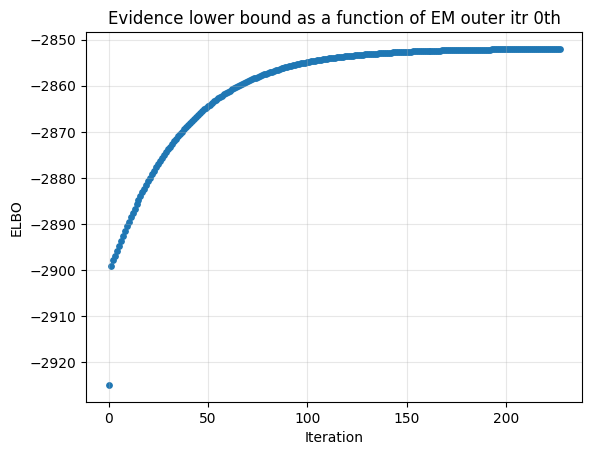

In [82]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_500SNPs_chr22.png",itr=0)

In [83]:
pred = v.predict(realVal_gdl)

> Generating polygenic scores...


In [84]:
r2(pred, realVal_gdl.sample_table.phenotype)

0.10113451528034216

In [85]:
# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realVal_gdl.sample_table.phenotype)
corr_train

0.318016533029876

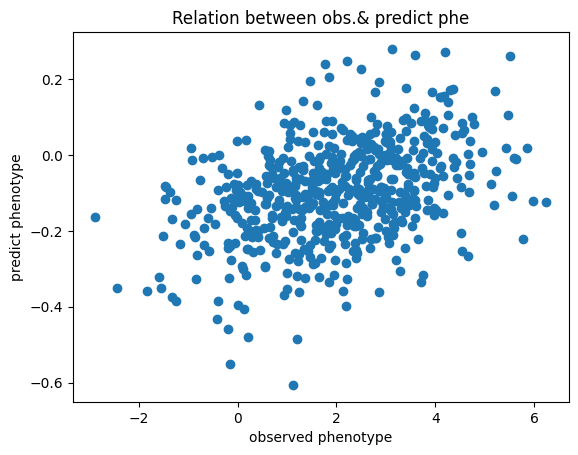

In [30]:
plot_obs_vs_pred(realVal_gdl.sample_table.phenotype, pred)

In [88]:
v.sigma_beta

0.0005337698077679693

In [31]:
pred.shape
realTrain_gdl.to_phenotype_table()

,FID,IID,phenotype
0,0,1000,1.800000
1,0,3000,2.010000
2,0,4000,2.540000
3,0,6000,0.900000
4,0,7000,2.190000
...,...,...,...
2135,0,3061000,2.370120
2136,0,3062000,3.914104
2137,0,3064000,4.955841
2138,0,3065000,1.029280


In [35]:
v.get_heritability()

0.22630399041502844

In [36]:
v.get_average_effect_size_variance()

0.0005327022681524333

In [37]:
a = v.history['ELBO']
a

[-2872.7546306199483,
 -2847.849469244868,
 -2846.5886458563664,
 -2845.702471332172,
 -2844.6591164284546,
 -2843.582527949927,
 -2842.5156889028885,
 -2841.4691616459017,
 -2840.4452328288157,
 -2839.4442130860657,
 -2838.465929948112,
 -2837.5100841504905,
 -2836.576338902151,
 -2835.6643439328354,
 -2834.7737426875046,
 -2833.9041748966147,
 -2833.0552777969347,
 -2832.2266869260475,
 -2831.4180367619206,
 -2830.628961290271,
 -2829.8590945260275,
 -2829.108070997939,
 -2828.375526199987,
 -2827.661097011631,
 -2826.9644220883215,
 -2826.285142223578,
 -2825.6229006838653,
 -2824.977343517462,
 -2824.3481198385,
 -2823.7348820873253,
 -2823.1372862683343,
 -2822.55499216637,
 -2821.987663542783,
 -2821.4349683121973,
 -2820.896578701015,
 -2820.3721713886466,
 -2819.8614276324256,
 -2819.364033377152,
 -2818.8796793501256,
 -2818.4080611425707,
 -2817.9488792782463,
 -2817.501839270052,
 -2817.0666516653923,
 -2816.6430320810164,
 -2816.2307012280357,
 -2815.829384927795,
 -2815.43

<h5> For chr22, all (around 1.8w) SNPs </h5> 
for all 2706 patients, 
I want to find the suitable fixed_paramters in viprs. 

In [89]:
# real_phe for 2706 samples
realA22_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/ALL_CM_chr22",
    phenotype_file="data/phenotype_data/DREAM_pheno_Full.csv",
)
#"Toy_example_expr/phenotype/shuffle500_phe.csv"

realA22_gdl.perform_gwas()
realA22_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/real_chr22.sumstats", sep="\t", index=False
)
realA22_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/all_chr22_out/')

realA22Train_gdl, realA22Val_gdl = realA22_gdl.split_by_samples(proportions=[.8, .2])

> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f1d9831aa60; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_gzh67n_4'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/array/routines.py:318: PerformanceWarning: Increasing number of chunks by factor of 18
  axes=(left_axes, right_axes),
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


In [94]:
print(realA22Train_gdl.sample_size)
print(realA22Val_gdl.sample_size)

2186
520


In [95]:
v = vp.VIPRS(realA22Train_gdl, fix_params={'pi': 0.999945, 'sigma_epsilon': 0.500000}) 
v.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


 11%|█▏        | 114/1000 [01:09<08:59,  1.64it/s]

Converged at iteration 115 | ELBO: -1293.033106
> Final ELBO: -1293.033106
> Estimated heritability: 0.595551
> Estimated proportion of causal variants: 0.999945


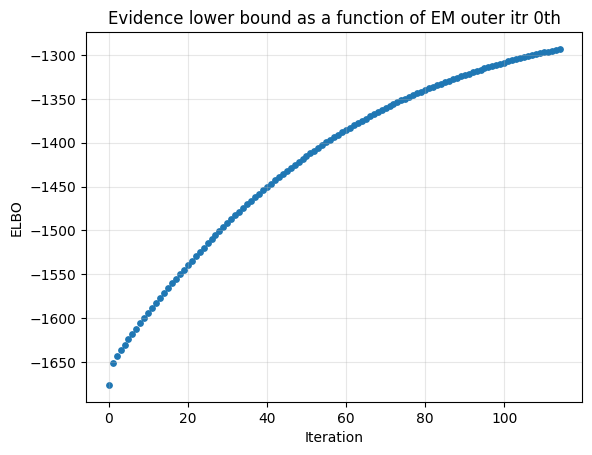

In [96]:
ELBO_plot(v.history['ELBO'], "Real_phe_expr/ELBO_plots/real_ALL_chr22.png",itr=0)

In [101]:
pred = v.predict(realA22Val_gdl)


> Generating polygenic scores...


In [102]:
print(r2(pred, realA22Val_gdl.sample_table.phenotype))
# realA22Train_gdl, realA22Val_gdl

# Pearson Correlation 
corr_train, p_value_train = pearsonr(pred, realA22Val_gdl.sample_table.phenotype)
corr_train


0.4600337650524509


0.6782578897826775

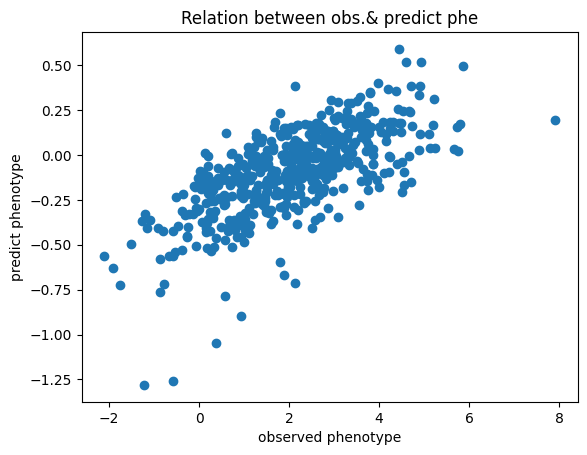

In [103]:
plot_obs_vs_pred(realA22Val_gdl.sample_table.phenotype, pred)

<h5> Use Grid to find the suitable sigma epsilon and pi </h5>

Simulated phenotpyes

In [149]:
beta500np = np.zeros(500)
beta500np[0:2] = 0.2     # rs11090428
beta500np[2:6] = 0.1/3
beta500 = {22: beta500np}
g_sim = mgp.GWASimulator("CMAll_qced/chr22/shuffle_500snps",
                        pi = [.99, .01],
                        h2=0.5)
g_sim.set_beta(beta500)
g_sim.simulate(reset_beta=False)
# g_sim.simulate()
g_sim.to_phenotype_table().to_csv("Toy_example_expr/phenotype/shuffle500_phe.csv",sep='\t')

> Reading BED file...
> Generating polygenic scores...


In [150]:
# simulation on 2706
sim500_gdl = mgp.GWADataLoader(
    bed_files = "CMAll_qced/chr22/shuffle_500snps",
    phenotype_file="Toy_example_expr/phenotype/shuffle500_phe.csv",
)

sim500_gdl.perform_gwas()
sim500_gdl.to_summary_statistics_table().to_csv(
    "Real_phe_expr/shuffle_500snps.sumstats", sep="\t", index=False
)
sim500_gdl.compute_ld(estimator='sample',
                output_dir='Real_phe_expr/shuffle500_chr22_out/')


> Reading BED file...
> Reading phenotype file...
> Performing GWAS...


Exception ignored in: <finalize object at 0x7f34710b0e10; dead>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 572, in __call__
    return info.func(*info.args, **(info.kwargs or {}))
  File "/usr/lib/python3.7/tempfile.py", line 934, in _cleanup
    _rmtree(name)
  File "/usr/lib/python3.7/shutil.py", line 485, in rmtree
    onerror(os.lstat, path, sys.exc_info())
  File "/usr/lib/python3.7/shutil.py", line 483, in rmtree
    orig_st = os.lstat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'temp/ld_huxhrh3y'
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


> Computing LD matrix...


/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Create grid  
The result will depends on the <code> training_data gdl and val_data gdl </code> I put into here. Then return me the most suitable <code> fixed_paramters: sigma_epsilon and pi</code> for this training dataset. 

In [60]:
# Create a grid:
grid = vp.HyperparameterGrid()
# Generate a grid for pi using 5 equidistant grid points:
grid.generate_pi_grid(steps=5, n_snps=realA22Train_gdl.n_snps)
# Generate a grid for sigma epsilon using 5 equidistant grid points:
grid.generate_sigma_epsilon_grid(steps=5)

vgv_gs = vp.VIPRSGridSearch(realA22Train_gdl, grid)
vgv_gs = vgv_gs.fit()

> Initializing model parameters
> Loading LD matrices into memory...
> Performing model fit...
> Using up to 1 threads.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:09<2:30:18,  9.03s/it]/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Stopping at iteration 2 for model 5: The optimization algorithm is not converging!
Previous ELBO: 64982.376733 | Current ELBO: 134323.839937
  if __name__ == "__main__":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Stopping at iteration 2 for model 7: The optimization algorithm is not converging!
Previous ELBO: 60576.275491 | Current ELBO: 134511.798950
  if __name__ == "__main__":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Stopping at iteration 2 for model 10: The optimization algorithm is not converging!
Previous ELBO: 2004.809960 | Current ELBO: 14924.639814
  if __name__ == "__main__":
/home/mcb/users/yzhu439/RA_Project/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Stopping at i

KeyboardInterrupt: 

In [ ]:
vgv_gs.select_best_model(validation_gdl=realA22Val_gdl, criterion='validation')

> Generating polygenic scores...


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

A small test for my new PC